In [2]:
import numpy as np
from spec_id import Gen_spec, Median_w_Error_cont
import matplotlib.pyplot as plt
from vtl.Photo import Photometry
from glob import glob
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [3]:
galDB = pd.read_pickle('../data/upd_galDB.pkl')
sphotdb = pd.read_pickle('../data/south_phot.pkl')
nphotdb = pd.read_pickle('../data/north_phot.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [4]:
def Magnitude(flam):
    mag=-2.5*np.log10(flam)
    return mag

# old

In [58]:
fDB = pd.read_pickle('../data/filter_db.pkl')
rfDB = pd.read_pickle('../data/rfit_phot_db.pkl')
o_galDB = pd.read_pickle('../data/sgal_param_DB.pkl')


In [59]:
fDB2 = fDB.query('S_F098>0')
fDB2 = fDB2.query('M_F850>0')

In [66]:
fDB2

,M_F098,M_F098_err,M_F850,M_F850_err,N_F085,N_F850_err,S_F098,S_F098_err,S_F850,S_F850_C,S_F850_C_err,S_F850_err,gids,flam_F098,flam_F098_err,flam_F850,flam_F850_err,SN
217,1.496379e-18,1.621893e-19,1.225968e-18,2.465678e-19,-99.0,-99.0,13.765172,0.079402,9.503550,9.129607,0.300012,0.096224,s38785,1.548229e-18,8.930691e-21,1.277688e-18,1.293666e-20,5.799220
220,4.505023e-18,1.586512e-19,4.039693e-18,2.542565e-19,-99.0,-99.0,44.080278,0.067520,32.128795,-99.000000,-99.000000,0.068761,s39170,4.957902e-18,7.594270e-21,4.319498e-18,9.244450e-21,16.006232
221,2.477103e-18,1.483160e-19,2.143670e-18,2.364250e-19,-99.0,-99.0,25.979935,0.066822,19.399888,19.237134,0.263971,0.068321,s39241,2.922077e-18,7.515763e-21,2.608183e-18,9.185295e-21,9.644928
223,1.678319e-18,1.328067e-19,1.461901e-18,2.080631e-19,-99.0,-99.0,17.910390,0.056882,13.142233,14.714118,0.471603,0.057927,s39631,2.014460e-18,6.397768e-21,1.766884e-18,7.787892e-21,7.367214
224,1.161039e-18,2.018796e-19,8.824926e-19,3.184032e-19,-99.0,-99.0,10.154887,0.045511,5.842636,5.866548,0.171964,0.052368,s39804,1.142165e-18,5.118821e-21,7.855027e-19,7.040522e-21,3.808534
227,3.029584e-19,1.094521e-19,2.418658e-19,1.750144e-19,-99.0,-99.0,2.968221,0.041870,1.710075,-99.000000,-99.000000,0.043448,s40223,3.338488e-19,4.709302e-21,2.299080e-19,5.841289e-21,1.955156
228,1.118938e-18,9.668918e-20,8.956508e-19,1.526055e-19,-99.0,-99.0,10.402789,0.045236,7.007352,6.671739,0.193995,0.051095,s40476,1.170047e-18,5.087891e-21,9.420909e-19,6.869376e-21,6.882982
230,2.779939e-18,1.274799e-19,2.230325e-18,2.007062e-19,-99.0,-99.0,22.794747,0.065137,14.216777,-99.000000,-99.000000,0.067947,s40597,2.563825e-18,7.326244e-21,1.911349e-18,9.135013e-21,12.850875
231,5.426981e-19,8.800602e-20,3.919642e-19,1.441276e-19,-99.0,-99.0,4.640340,0.056503,2.684625,-99.000000,-99.000000,0.064232,s40623,5.219194e-19,6.355140e-21,3.609296e-19,8.635556e-21,3.946809
234,3.560849e-19,1.229191e-19,2.678728e-19,1.950975e-19,-99.0,-99.0,3.682552,0.055319,2.190547,-99.000000,-99.000000,0.056335,s41148,4.141928e-19,6.221970e-21,2.945042e-19,7.573858e-21,2.049116


(0, 5e-18)

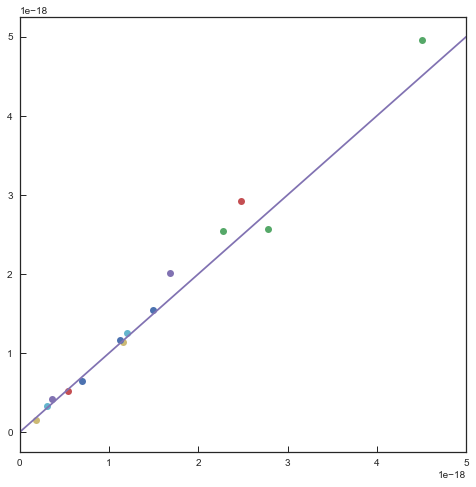

In [68]:
plt.figure(figsize=[8,8])
for i in fDB2.index:
    plt.plot(rfDB.f098p[i],fDB2.flam_F098[i],'o')
plt.plot([0,5E-18],[0,5E-18])
plt.xlim(0,5E-18)

In [23]:
Color = []
Color_sig = []
M_Color = []
M_Color_sig = []
D_Color_sig = []
SN = []
beta = (2.5/np.log(10))**2
for i in fDB2.index:
    Color.append(Magnitude(rfDB['f098p'][i]/rfDB['f850p'][i]))
    Color_sig.append(np.sqrt(beta*((rfDB['f098err'][i]/rfDB['f098p'][i])**2 + 
                                   (rfDB['f850err'][i]/rfDB['f850p'][i])**2)))
    
    M_Color.append(Magnitude(fDB2['M_F098'][i]/fDB2['M_F850'][i]))
    M_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)))
    
    D_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)+
                               (rfDB['f098err'][i]/rfDB['f098p'][i])**2 + 
                               (rfDB['f850err'][i]/rfDB['f850p'][i])**2))

    SN.append(galDB.SN[i])
        
D_Color = np.array(Color) - np.array(M_Color)

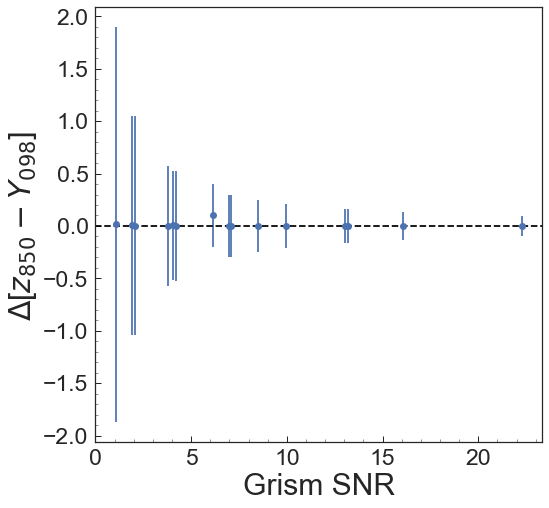

In [25]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.errorbar(SN,D_Color,D_Color_sig,fmt='o')
# plt.axhline(-.05,color='r',label = 'Median Offset = 0.05 Mag')
plt.axhline(.0,color='k',linestyle='--')
plt.ylabel('$\Delta$[$z_{850}-Y_{098}$] ',size=30)
plt.xlabel('Grism SNR',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.legend(fontsize=20)
plt.savefig('../plots/dcolor1.pdf',bbox_inches = 'tight')

# with new sample


In [10]:
photdb = sphotdb.query('f_F098M > 0').query('f_F850LP > 0')

In [ ]:
# *(3E18 / photdb['f_F850LP'][0] **2 * 10**((-1.1)/2.5-29))

In [28]:
f098wv = []
f098p = []
f098err = []

f850wv = []
f850p = []
f850err = []

O_098 = []
O_098_err = []

O_850 = []
O_850_err = []

idnum = []
SNR = []

effwv_098 = 9840.877482
effwv_850 = 9001.008862

for i in galDB.index:
    if int(galDB.gids[i][1:]) in photdb.index.values+1:
        idnum.append(int(galDB.gids[i][1:]) -1)
        SNR.append(galDB.SNR[i])
        O_098.append(photdb.f_F098M[int(galDB.gids[i][1:]) -1]*(3E18 / photdb['f_F098M'][0] **2 * 10**((-1.1)/2.5-29)))
        O_098_err.append(photdb.e_F098M[int(galDB.gids[i][1:]) -1]*(3E18 / photdb['f_F098M'][0] **2 * 10**((-1.1)/2.5-29)))

        O_850.append(photdb.f_F850LP[int(galDB.gids[i][1:]) -1]*(3E18 / photdb['f_F850LP'][0] **2 * 10**((-1.1)/2.5-29)))
        O_850_err.append(photdb.e_F850LP[int(galDB.gids[i][1:]) -1]*(3E18 / photdb['f_F850LP'][0] **2 * 10**((-1.1)/2.5-29)))
        
        spec = Gen_spec(galDB['gids'][i], galDB['z_grism'][i],minwv=7500,maxwv=11500,tmp_err=False)
        gal_phot = Photometry(spec.gal_wv[spec.gal_fl > 5E-21],spec.gal_fl[spec.gal_fl > 5E-21],
                              spec.gal_er[spec.gal_fl > 5E-21],201)

        gal_phot.Get_Sensitivity(201)
        gal_phot.Photo_clipped()
        f098wv.append(gal_phot.eff_wv)
        f098p.append(gal_phot.photo)
        f098err.append(gal_phot.photo_er)

        gal_phot.Get_Sensitivity(240)
        gal_phot.Photo_clipped()
        f850wv.append(gal_phot.eff_wv)
        f850p.append(gal_phot.photo)
        f850err.append(gal_phot.photo_er)

/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3422: RuntimeWarning: invalid value encountered in sqrt
  resid = np.abs(self.scif - self.flat_flam)*np.sqrt(self.ivarf)
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3427: RuntimeWarning: invalid value encountered in sqrt
  contam_mask = ((self.contam*np.sqrt(self.ivar) > contam_sn_mask[0]) &
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:3428: RuntimeWarning: invalid value encountered in sqrt
  (self.model*np.sqrt(self.ivar) < contam_sn_mask[1]))
/Users/vestrada/miniconda3/envs/astroconda/lib/python3.5/site-packages/grizli-0.6.0_115_g3ce5ccf-py3.5-macosx-10.6-x86_64.egg/grizli/model.py:544: RuntimeWarning: divide by zero encountered in true_divide
  self.op

In [43]:
fitphot = pd.DataFrame({'ids':idnum, 'SNR':SNR,
                'f098wv' : f098wv ,'f098p' : f098p, 'f098err' : f098err,
                'f850wv' : f850wv ,'f850p' : f850p, 'f850err' : f850err,
                'O_f098p': O_098 ,'O_f098err' : O_098_err,
                'O_f850p': O_850 ,'O_f850err' : O_850_err,})

In [69]:
Color = []
Color_sig = []
M_Color = []
M_Color_sig = []
D_Color_sig = []
SN = []
beta = (2.5/np.log(10))**2
for i in fitphot.index:
    Color.append(Magnitude(fitphot['f098p'][i]/fitphot['f850p'][i]))
    Color_sig.append(np.sqrt(beta*((fitphot['f098err'][i]/fitphot['f098p'][i])**2 + 
                                   (fitphot['f850err'][i]/fitphot['f850p'][i])**2)))
    
    M_Color.append(Magnitude(fitphot['O_f098p'][i]/fitphot['O_f850p'][i]))
    M_Color_sig.append(np.sqrt(beta*((fitphot['O_f098err'][i]/fitphot['O_f098p'][i])**2 + 
                                     (fitphot['O_f850err'][i]/fitphot['O_f850p'][i])**2)))
    
    D_Color_sig.append(np.sqrt(beta*((fitphot['O_f098err'][i]/fitphot['O_f098p'][i])**2 + 
                                     (fitphot['O_f850err'][i]/fitphot['O_f850p'][i])**2)+
                               (fitphot['f098err'][i]/fitphot['f098p'][i])**2 + 
                               (fitphot['f850err'][i]/fitphot['f850p'][i])**2))
      
D_Color = np.array(Color) - np.array(M_Color)

No handles with labels found to put in legend.


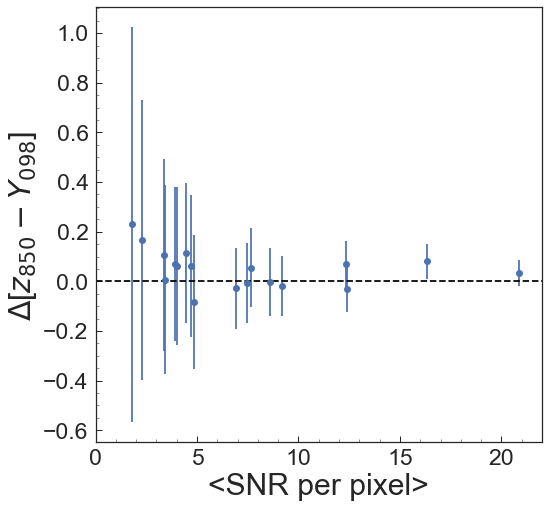

In [71]:
plt.figure(figsize=[8,8])
plt.errorbar(fitphot.SNR,D_Color,D_Color_sig,fmt='o')
# plt.axhline(np.mean(D_Color),color='r',label = 'Median Offset = 0.05 Mag')
plt.axhline(.0,color='k',linestyle='--')
plt.ylabel('$\Delta$[$z_{850}-Y_{098}$] ',size=30)
plt.xlabel('<SNR per pixel>',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.xlim(0,22)
plt.legend(fontsize=20)
plt.savefig('../plots/dcolor1.pdf',bbox_inches = 'tight')

ValueError: In safezip, len(args[0])=18 but len(args[1])=1

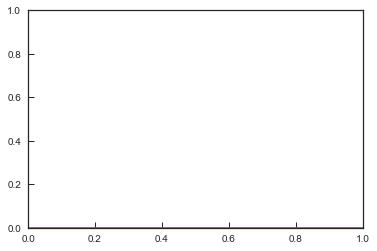

In [44]:
plt.errorbar(np.arange(len(fitphot.index)),fitphot.O_f098p.values,fitphot.O_f098err.values,'o')

In [45]:
fitphot

,O_f098err,O_f098p,O_f850err,O_f850p,SNR,f098err,f098p,f098wv,f850err,f850p,f850wv,ids
0,8.930691e-21,1.548229e-18,1.292739e-20,1.276772e-18,7.450741,1.149656e-19,1.496359e-18,9840.877482,1.745075e-19,1.225939e-18,9001.008862,38784
1,6.918974e-21,3.012749e-19,9.420935e-21,2.013918e-19,1.803361,1.054931e-19,2.874116e-19,9840.877482,1.672558e-19,2.373678e-19,9001.008862,39011
2,7.594270e-21,4.957902e-18,9.237820e-21,4.316401e-18,20.847010,1.136968e-19,4.500173e-18,9840.877482,1.809943e-19,4.043013e-18,9001.008862,39169
3,7.515763e-21,2.922077e-18,9.178708e-21,2.606313e-18,12.383246,1.051770e-19,2.479772e-18,9840.877482,1.675654e-19,2.145907e-18,9001.008862,39240
4,6.397768e-21,2.014460e-18,7.782307e-21,1.765617e-18,9.169197,9.418678e-20,1.670518e-18,9840.877482,1.538635e-19,1.437580e-18,9001.008862,39630
5,5.118821e-21,1.142165e-18,7.035473e-21,7.849394e-19,4.478888,1.431360e-19,1.161039e-18,9840.877482,2.254828e-19,8.866835e-19,9001.008862,39803
6,6.053596e-21,6.100442e-19,8.186153e-21,4.836553e-19,3.911056,8.894246e-20,6.099749e-19,9840.877482,1.409304e-19,5.159697e-19,9001.008862,39804
7,4.709302e-21,3.338488e-19,5.837100e-21,2.297431e-19,2.274337,7.760630e-20,3.072524e-19,9840.877482,1.238901e-19,2.464607e-19,9001.008862,40222
8,5.087891e-21,1.170047e-18,6.864450e-21,9.414153e-19,8.618531,6.860613e-20,1.108815e-18,9840.877482,1.078582e-19,8.889374e-19,9001.008862,40475
9,7.326244e-21,2.563825e-18,9.128462e-21,1.909978e-18,16.323233,9.037200e-20,2.779939e-18,9840.877482,1.420607e-19,2.230325e-18,9001.008862,40596
